In [1]:
import torch
import random
import numpy as np
import torch.nn as nn
import tensorflow as tf

In [2]:
INPUT_SIZE = 1
SEQ_LENGTH = 100
HIDDEN_SIZE = 500
NUM_LAYERS = 1
BATCH_SIZE = 1

In [3]:
rnn = nn.RNN(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, num_layers = NUM_LAYERS, batch_first=True)
optimiser = torch.optim.SGD(rnn.parameters(),lr = 0.001)
criterion = nn.SoftMarginLoss()

In [4]:
trials = 1000
option = [-1,1]
color = []

for i in range(trials):
    mu = random.sample(option,1)[0]
    if mu < 0:
        color.append('b')
    else:
        color.append('r')
    x = np.random.normal(mu,1,SEQ_LENGTH)
    x = torch.Tensor(x)
    inputs = x.view(BATCH_SIZE, SEQ_LENGTH, INPUT_SIZE)
    y_predicted,h = rnn(inputs)
    temp = y_predicted
    temp = temp.detach().numpy()
    temp = temp[-1, :, :]
    temp = tf.transpose(temp)
    temp = tf.reshape(temp,[HIDDEN_SIZE,SEQ_LENGTH,1])
    if 'y_all' in locals():
        y_all = tf.concat([y_all,temp],2)
    else:
        y_all = temp
    mu_t = torch.Tensor(np.ones(y_predicted.shape) * mu)
    loss = criterion(y_predicted,torch.Tensor(np.ones(y_predicted.shape)*mu))
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()

Metal device set to: Apple M1 Max


2022-09-14 16:21:51.493215: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-14 16:21:51.493389: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
mu = 1
x = np.random.normal(mu,1,SEQ_LENGTH)
x = torch.Tensor(x)
inputs = x.view(BATCH_SIZE, SEQ_LENGTH, INPUT_SIZE)
out, h_n = rnn(inputs)

In [6]:
color_bar = []
for i in range(500):
    if h_n[0][0][i] > 0:
        color_bar.append('b')
    else:
        color_bar.append('r')

Rank-1 models:  min obj, 0.71;  max obj, 0.71;  time to fit, 11.8s


(<Figure size 1440x360 with 3 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object),
 array([[<BarContainer object of 500 artists>,
         list([<matplotlib.lines.Line2D object at 0x2db6622b0>]),
       dtype=object))

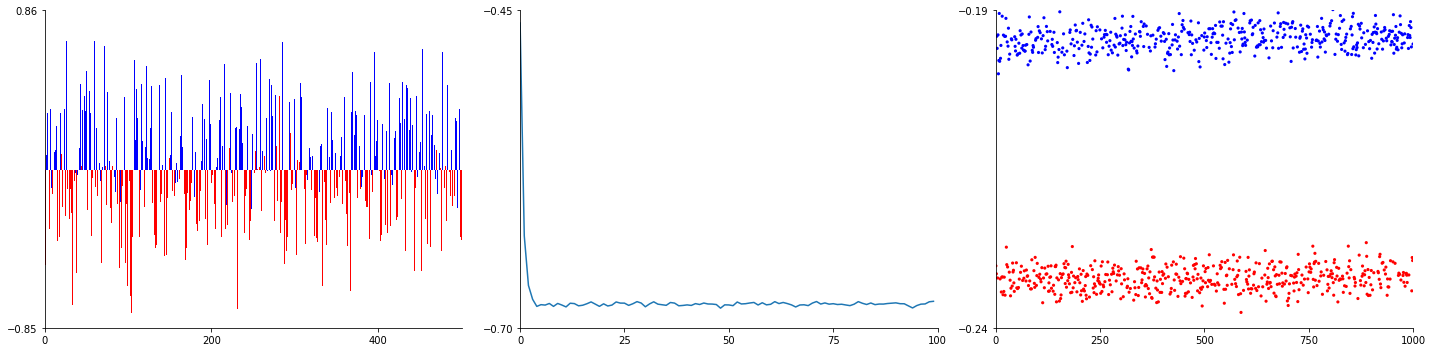

In [7]:
import tensortools as tt
import matplotlib.pyplot as plt
ensemble = tt.Ensemble(fit_method="cp_als")
ensemble.fit(y_all, ranks=[1], replicates=4)
num_components = 1
replicate = 0
kw_sc = {'c':color}
fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20, 5))
tt.plot_factors(ensemble.factors(num_components)[replicate],fig = fig1,axes = (ax1,ax2,ax3),plots=['bar','line','scatter'],scatter_kw = kw_sc,bar_kw = {'color':color_bar})  # plot the low-d factors

In [8]:
#fig1.savefig('plot_cp.jpg', format='jpg',dpi = 1000)